In [2]:
import random
import autograd.numpy as np
from autograd import grad, jacobian
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
def f1(x):
  return 1 / (x ** 2 - 3 * x + 2)

def get_sample():
  np.random.seed(seed=60) # fixed state of randgenerator
  alpha, beta = random.randrange(0, 1), random.randrange(0, 1)
  n = 1000
  x = []
  y = []
  mu, sigma = 0, 1 # mean and standard deviation
  np.random.normal(mu, sigma)
  for k in range(n):
    if f1(3 * k / n) < -100:
      x.append(3 * k / n)
      y.append(-100 + np.random.normal(mu, sigma))
    elif -100 <= f1(3 * k / n) <= 100:
      x.append(3 * k / n)
      y.append(f1(x[k]) + np.random.normal(mu, sigma))
    else:
      x.append(3 * k / n)
      y.append(100 + np.random.normal(mu, sigma))
  return x, y

def D1(z, *arg):
  n = 1000
  a,b,c,d=z
  x1 = get_sample()[0]
  y = get_sample()[1]
  return sum([(((a*x1[i]+b)/(x1[i]**2+c*x1[i]+d))-y[i])**2 for i in range(0,n)])

def D1_1(z,*arg):
    n = 1000
    a, b, c, d =z 
    x = get_sample()[0]
    y = get_sample()[1]
    return [((a*x[i]+b)/(x[i]**2+c*x[i]+d))-y[i] for i in range(0,n)]


def D2(x = []):  
    n = 1000
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    x = get_sample()[0]
    y = get_sample()[1]
    D1 = 0
    for k in range(n):
      D1 += ((a*x[k] + b) / (x[k]**2 + c*x[k] + d) - y[k]) ** 2
    return D1

def approximation(a, b, c, d):
  n = 1000
  x = []
  y = []
  for k in range(n):
    x.append(3 * k / n)
    y.append((a*x[k] + b) / (x[k]**2 + c*x[k] + d))
  return x, y

def get_plot(title_plot, x, y, x1 = [], y1 = [], x2 = [], y2 = [], x3 = [], y3 = [], x4 = [], y4 = []):
  plt.figure(figsize=(20,7)) #determed size of graph
  plt.title(title_plot)   #give title to the graph
  plt.xlabel('x') #label of x axes
  plt.ylabel('y') #label of y axes
  plt.legend(labels=['Noise data', 'Approximity function'])
  plt.plot(x, y, marker="", label = "Noise data", color='red') #drew noise data 
  plt.plot(x1, y1, linewidth = 1, label = "Nelder-Mead", color='blue') #drew approx function
  plt.plot(x2, y2, linewidth = 1, label = "Levenberg-Marquardt", color='green') #drew approx function
  plt.plot(x3, y3, linewidth = 1, label = "Simulate annealing", color='magenta') #drew approx function
  plt.plot(x4, y4, linewidth = 1, label = "Differential evolution", color='orange') #drew approx function  
  plt.legend(loc='upper left') #show legend
  plt.show() # show plot

In [30]:
print(D1([-1.00345713,  1.00391925, -2.00080429,  1.00082048]))

136006.66133510595


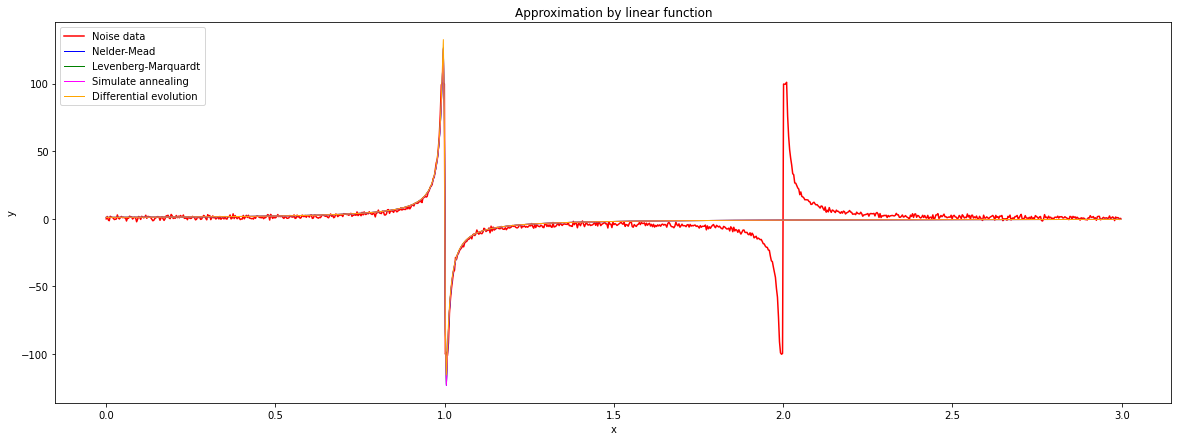

In [25]:
get_plot("Approximation by linear function", 
         get_sample()[0], get_sample()[1], 
         x1 = approximation(-1.00164174,  1.00212728, -2.00089885,  1.00091501)[0],  #Nelder-Mead
         y1 = approximation(-1.00164174,  1.00212728, -2.00089885,  1.00091501)[1],  #Nelder-Mead
         x2 = approximation(-1.00345713,  1.00391925, -2.00080429,  1.00082048)[0],  #LMA
         y2 = approximation(-1.00345713,  1.00391925, -2.00080429,  1.00082048)[1],  #LMA
         x3 = approximation(-1.00137479,  1.0018604 , -2.00089946,  1.00091561)[0],  #Simulate annealing
         y3 = approximation(-1.00137479,  1.0018604 , -2.00089946,  1.00091561)[1],  #Simulate annealing
         x4 = approximation(-1.00161852,  1.00187403, -2.        ,  1.00001616)[0],  #Differential evolution
         y4 = approximation(-1.00161845,  1.00187399, -2.        ,  1.00001616)[1]   #Differential evolution
         )


# Simulated annealing

In [29]:
x0=np.array([1,1,1,1])
sm = scipy.optimize.basinhopping(D1, x0, niter=1)
print(sm)

                        fun: 136001.27760833985
 lowest_optimization_result:       fun: 136001.27760833985
 hess_inv: array([[ 1.86217087e-12, -8.04363081e-12,  3.12251583e-12,
        -3.16575137e-12],
       [-8.04363081e-12,  1.23793478e-10, -2.16542783e-11,
         2.17412874e-11],
       [ 3.12251583e-12, -2.16542783e-11,  9.18825920e-12,
        -9.29266092e-12],
       [-3.16575137e-12,  2.17412873e-11, -9.29266092e-12,
         9.40978365e-12]])
      jac: array([ 0.30078125,  0.30273438, 72.60546875, 67.79296875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1115
      nit: 54
     njev: 184
   status: 2
  success: False
        x: array([-1.00136828,  1.00185379, -2.00089917,  1.00091531])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 2
                       nfev: 2165
                        nit: 1
                       njev: 357
                    

# Differential evolution

In [27]:
bounds = [(-2,2),(-2,2),(-2,2),(-2,2)]
print(scipy.optimize.differential_evolution(D1, bounds, maxiter=1))

     fun: 136472.08474821065
     jac: array([-8.68574716e+01, -8.69535143e+01,  1.05392543e+06,  3.91738140e+03])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 895
     nit: 1
 success: False
       x: array([-1.00161852,  1.00187403, -2.        ,  1.00001616])


# Levenberg-Marquardt

In [5]:
x0=np.array([0.001,0.001,0.001,0.001]) 
from scipy.optimize import least_squares 
lm= least_squares(D1_1, x0, method='lm')
print(lm)

 active_mask: array([0, 0, 0, 0])
        cost: 68003.33198020615
         fun: array([ 1.08941386e+00, -6.60143616e-01,  1.74634110e+00,  2.49061128e+00,
       -8.00561604e-01, -2.30891178e-01,  1.28575523e-01,  5.07470883e-01,
        1.61427055e+00,  1.45332093e+00,  1.23116459e+00, -1.76971243e+00,
        4.77394928e-01,  1.18771851e+00,  2.95802095e-01, -6.52151583e-01,
        2.35379112e-01, -4.45279088e-02,  4.59510420e-01,  2.52884299e-01,
        2.72969970e+00,  5.48200985e-01,  7.83842258e-01, -7.90928361e-01,
       -4.21421108e-01, -3.16966323e-01,  1.30315212e+00,  4.86148073e-01,
        1.12812740e-02,  5.30329125e-01,  3.34016416e+00,  1.26654938e+00,
       -5.90821310e-01,  1.43376920e-01,  1.62734558e+00, -6.76931403e-01,
       -5.92820337e-02,  4.72419154e-01,  4.90206356e-03, -1.44042898e+00,
        8.39762530e-01, -5.82632955e-01, -3.95047158e-01, -2.90275715e-01,
        5.12535009e-01,  1.53691434e+00,  2.67202625e+00,  2.20326134e+00,
        9.08873526e-

# Nelder-Mead

In [11]:
x0=np.array([2,2,2,2])
print(scipy.optimize.minimize(D1, x0, method="Nelder-Mead"))

 final_simplex: (array([[-1.00164174,  1.00212728, -2.00089885,  1.00091501],
       [-1.00161462,  1.00210028, -2.00089892,  1.00091509],
       [-1.00167217,  1.00215784, -2.00089894,  1.0009151 ],
       [-1.00162097,  1.00210656, -2.00089862,  1.00091479],
       [-1.00161644,  1.00210195, -2.00089889,  1.00091506]]), array([136001.26997065, 136001.26998892, 136001.27004197, 136001.27004784,
       136001.27004892]))
           fun: 136001.2699706518
       message: 'Optimization terminated successfully.'
          nfev: 746
           nit: 441
        status: 0
       success: True
             x: array([-1.00164174,  1.00212728, -2.00089885,  1.00091501])
